<a href="https://colab.research.google.com/github/DaovaJo/AI_Datasiency/blob/main/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_%22%D0%92%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%98%D0%98%22%2C_%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D1%81_DALLE_mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лекция "Введение в ИИ"
Ссылка на colab: https://colab.research.google.com/drive/1ljJng74zhTeBLY63QA1pYKiBgf5OTePd?usp=sharing


В практической части занятия поработаем "напрямую" с моделью DALL-E mini.

## DALL·E mini

[**DALL·E mini**](https://github.com/borisdayma/dalle-mini) — это онлайн-генератор изображений на основе текста. Модель можно использовать как на [сайте](https://www.craiyon.com/), так и в соответствующей среде разработки (Colab, Jupyter Notebook и тд). В данном ноутбуке мы используем второй вариант.

<img src="https://github.com/borisdayma/dalle-mini/blob/main/img/logo.png?raw=true" width="200">



DALL·E mini использует архитектуру, схожую с DALL·E 2, при этом являясь ее упрощенной версией. 
OpenAI (DALL·E 2) ограничивает доступ к своим моделям, при этом DALL-E mini находится в свободном доступе.


Запросы к модели могут быть как реалистичными — например, интерьер в стиле джапанди, так и абсолютно невозможными в жизни, как робот-пылесос на дне Мариинской впадины. На основе любого текста выдается результат в виде коллажа из девяти изображений.


## Архитектура DALLE-mini

<img src="https://www.assemblyai.com/blog/content/images/2022/04/diffusion.png" width="1000">

Эмбеддинг — сопоставление элемента (слова, предложения, etc.) числовому вектору.

Чаще всего эбеддинги используются для сжатого представления исходных данных (уменьшения размерности)

<img src="https://www.assemblyai.com/blog/content/images/2022/04/text_to_image_encoding_2.png" width="500">




[**Подробно про архитектуру DALLE-mini**](https://wandb.ai/dalle-mini/dalle-mini/reports/DALL-E-Mini-Explained--Vmlldzo4NjIxODA)

## 🛠️ Установка и настройка

In [ ]:
# Установка библиотек
!pip install -q dalle-mini
!pip install -q git+https://github.com/patil-suraj/vqgan-jax.git

     |████████████████████████████████| 197 kB 61.2 MB/s 
     |████████████████████████████████| 197 kB 49.7 MB/s 
     |████████████████████████████████| 1.8 MB 12.8 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 4.4 MB 54.4 MB/s 
     |████████████████████████████████| 235 kB 66.8 MB/s 
     |████████████████████████████████| 596 kB 65.6 MB/s 
     |████████████████████████████████| 217 kB 55.8 MB/s 
     |████████████████████████████████| 145 kB 11.7 MB/s 
     |████████████████████████████████| 51 kB 3.7 MB/s 
     |████████████████████████████████| 72 kB 412 kB/s 
     |████████████████████████████████| 101 kB 8.0 MB/s 
     |████████████████████████████████| 6.6 MB 18.8 MB/s 
     |████████████████████████████████| 181 kB 77.6 MB/s 
     |████████████████████████████████| 147 kB 66.9 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 


Нам необходимо установить:
* DALL·E mini для перевода текста в эбеддинг изображения
* VQGAN для декодирования изображений (перевод эмбеддинга изображения в итоговое изображение)

In [ ]:
# dalle-mega
#DALLE_MODEL = "dalle-mini/dalle-mini/mega-1-fp16:latest"  # Если у вас Colab PRO раскомментируйте строку, используйте mega-1-fp16:latest вместо mini-1:v0
DALLE_MODEL = "dalle-mini/dalle-mini/mini-1:v0" 
DALLE_COMMIT_ID = None

# VQGAN model
VQGAN_REPO = "dalle-mini/vqgan_imagenet_f16_16384"
VQGAN_COMMIT_ID = "e93a26e7707683d349bf5d5c41c5b0ef69b677a9"

In [ ]:
import jax
"JAX — это NumPy на CPU, GPU и TPU для высокопроизводительных исследований в области машинного обучения."
import jax.numpy as jnp

# Проверить кол-во активных устройств
jax.local_device_count()

1

In [ ]:
# Загрузка моделей и токенизатора
from dalle_mini import DalleBart, DalleBartProcessor
from vqgan_jax.modeling_flax_vqgan import VQModel
#from transformers import CLIPProcessor, FlaxCLIPModel

In [ ]:
# Загрузка dalle-mini
model, params = DalleBart.from_pretrained(
    DALLE_MODEL, revision=DALLE_COMMIT_ID, dtype=jnp.float16, _do_init=False
)

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Downloading large artifact mini-1:v0, 1673.43MB. 7 files... Done. 0:0:28.9


In [ ]:
model.config

DalleBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "architectures": [
    "eBart"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 16385,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 2730,
  "decoder_layers": 12,
  "decoder_start_token_id": 16384,
  "do_sample": true,
  "dropout": 0.0,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 2730,
  "encoder_layers": 12,
  "encoder_vocab_size": 50264,
  "eos_token_id": 16385,
  "force_ln_scale": false,
  "gradient_checkpointing": true,
  "image_length": 256,
  "image_vocab_size": 16384,
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "ln_positions": "normformer",
  "ln_type": "layernorm",
  "max_length": 257,
  "max_text_length": 64,
  "min_length": 257,
  "model_type": "dallebart",
  "normalize_text": true,
  "pad_token_id": 16385,
  "scale_embedding": false,
  "sinkhorn_iters": 1,
  "tau_init": 0.05,
  "tie_word_embeddings": false,
  "transformers_version": "4.20.1",
  "us

In [ ]:
# Загрузка VQGAN (для декодирования изображений)
vqgan, vqgan_params = VQModel.from_pretrained(
    VQGAN_REPO, revision=VQGAN_COMMIT_ID, _do_init=False
)

Downloading:   0%|          | 0.00/434 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/290M [00:00<?, ?B/s]

Параметры модели реплицируются на каждом устройстве для более быстрой работы.

(в случае jax.local_device_count() > 1)

In [ ]:
from flax.jax_utils import replicate

params = replicate(params)
vqgan_params = replicate(vqgan_params)

Функции модели компилируются и распараллеливаются, чтобы использовать преимущества нескольких устройств.

In [ ]:
from functools import partial

# model inference
@partial(jax.pmap, axis_name="batch", static_broadcasted_argnums=(3, 4, 5, 6))
def p_generate(
    tokenized_prompt, key, params, top_k, top_p, temperature, condition_scale
):
    return model.generate(
        **tokenized_prompt,
        prng_key=key,
        params=params,
        top_k=top_k,
        top_p=top_p,
        temperature=temperature,
        condition_scale=condition_scale,
    )


# decode image
@partial(jax.pmap, axis_name="batch")
def p_decode(indices, params):
    return vqgan.decode_code(indices, params=params)

Ключи передаются в модель на каждом устройстве для создания уникального вывода для каждого устройства.

In [ ]:
import random

seed = random.randint(0, 2**32 - 1)
key = jax.random.PRNGKey(seed)

## 🖍 Ввод текста

Загрузим обработчик текста

In [ ]:
from dalle_mini import DalleBartProcessor

processor = DalleBartProcessor.from_pretrained(DALLE_MODEL, revision=DALLE_COMMIT_ID)

wandb: Downloading large artifact mini-1:v0, 1673.43MB. 7 files... Done. 0:0:12.6


Downloading:   0%|          | 0.00/34.2M [00:00<?, ?B/s]

### Напишем текст для передачи в модель.

In [ ]:
prompts = [
    "Dogs with flowers",
]

In [ ]:
tokenized_prompts = processor(prompts)

Реплицируем текст на каждое устройство.

In [ ]:
tokenized_prompt = replicate(tokenized_prompts)

## 🎨 Генерация изображений

Мы генерируем эмбеддинг изображения из текста используя модель DALLE-mini и затем декодируем их с помощью VQGAN.

In [ ]:
# Количество генерируемых изображений
n_predictions = 8

# Мы можем настроить параметры генерации (see https://huggingface.co/blog/how-to-generate)
gen_top_k = None
gen_top_p = None
temperature = None
cond_scale = 10.0

Prompts: ['Dogs with flowers']



  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/jax/_src/ops/scatter.py:90: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float16 to dtype=float32. In future JAX releases this will result in an error.
  FutureWarning)


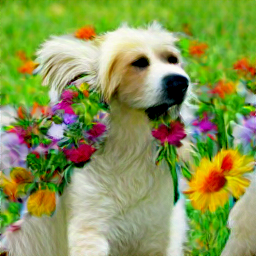

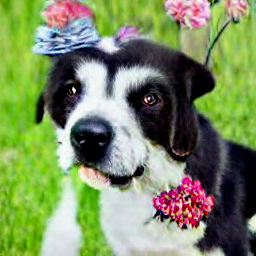

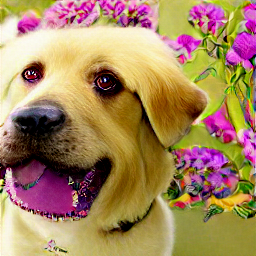

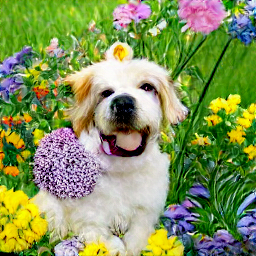

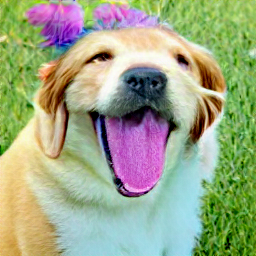

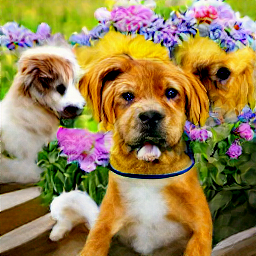

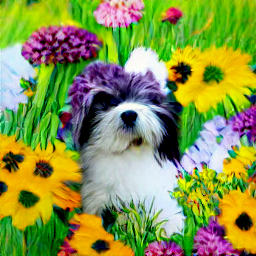

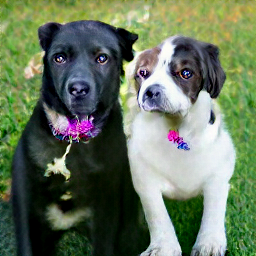

In [ ]:
from flax.training.common_utils import shard_prng_key
import numpy as np
from PIL import Image
from tqdm.notebook import trange

print(f"Prompts: {prompts}\n")
# генерация картинок
images = []
for i in trange(max(n_predictions // jax.device_count(), 1)):
    # get a new key
    key, subkey = jax.random.split(key)
    encoded_images = p_generate(
        tokenized_prompt,
        shard_prng_key(subkey),
        params,
        gen_top_k,
        gen_top_p,
        temperature,
        cond_scale,
    )
    # remove BOS
    encoded_images = encoded_images.sequences[..., 1:]
    # decode images
    decoded_images = p_decode(encoded_images, vqgan_params)
    decoded_images = decoded_images.clip(0.0, 1.0).reshape((-1, 256, 256, 3))
    for decoded_img in decoded_images:
        img = Image.fromarray(np.asarray(decoded_img * 255, dtype=np.uint8))
        images.append(img)
        display(img)
        print()

In [ ]:
#Сохраним первое изображение
images[0].save("img.png")